In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("./blog.mplstyle")

field definitions: https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv

focus on consumption? energy "use"? 
- what share of the energy we use comes from renewables?

In [142]:
df = pd.read_csv("../data/owid-energy-data.csv")
df = df[df["year"] >= 1970]

In [143]:
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [144]:
us_df = df[df["country"] == "United States"]

In [145]:
us_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
20439,United States,1970,USA,200328336.0,4.912636e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20440,United States,1971,USA,202907920.0,5.065682e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20441,United States,1972,USA,205238384.0,5.334297e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20442,United States,1973,USA,207314768.0,5.637203e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20443,United States,1974,USA,209277968.0,5.621366e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


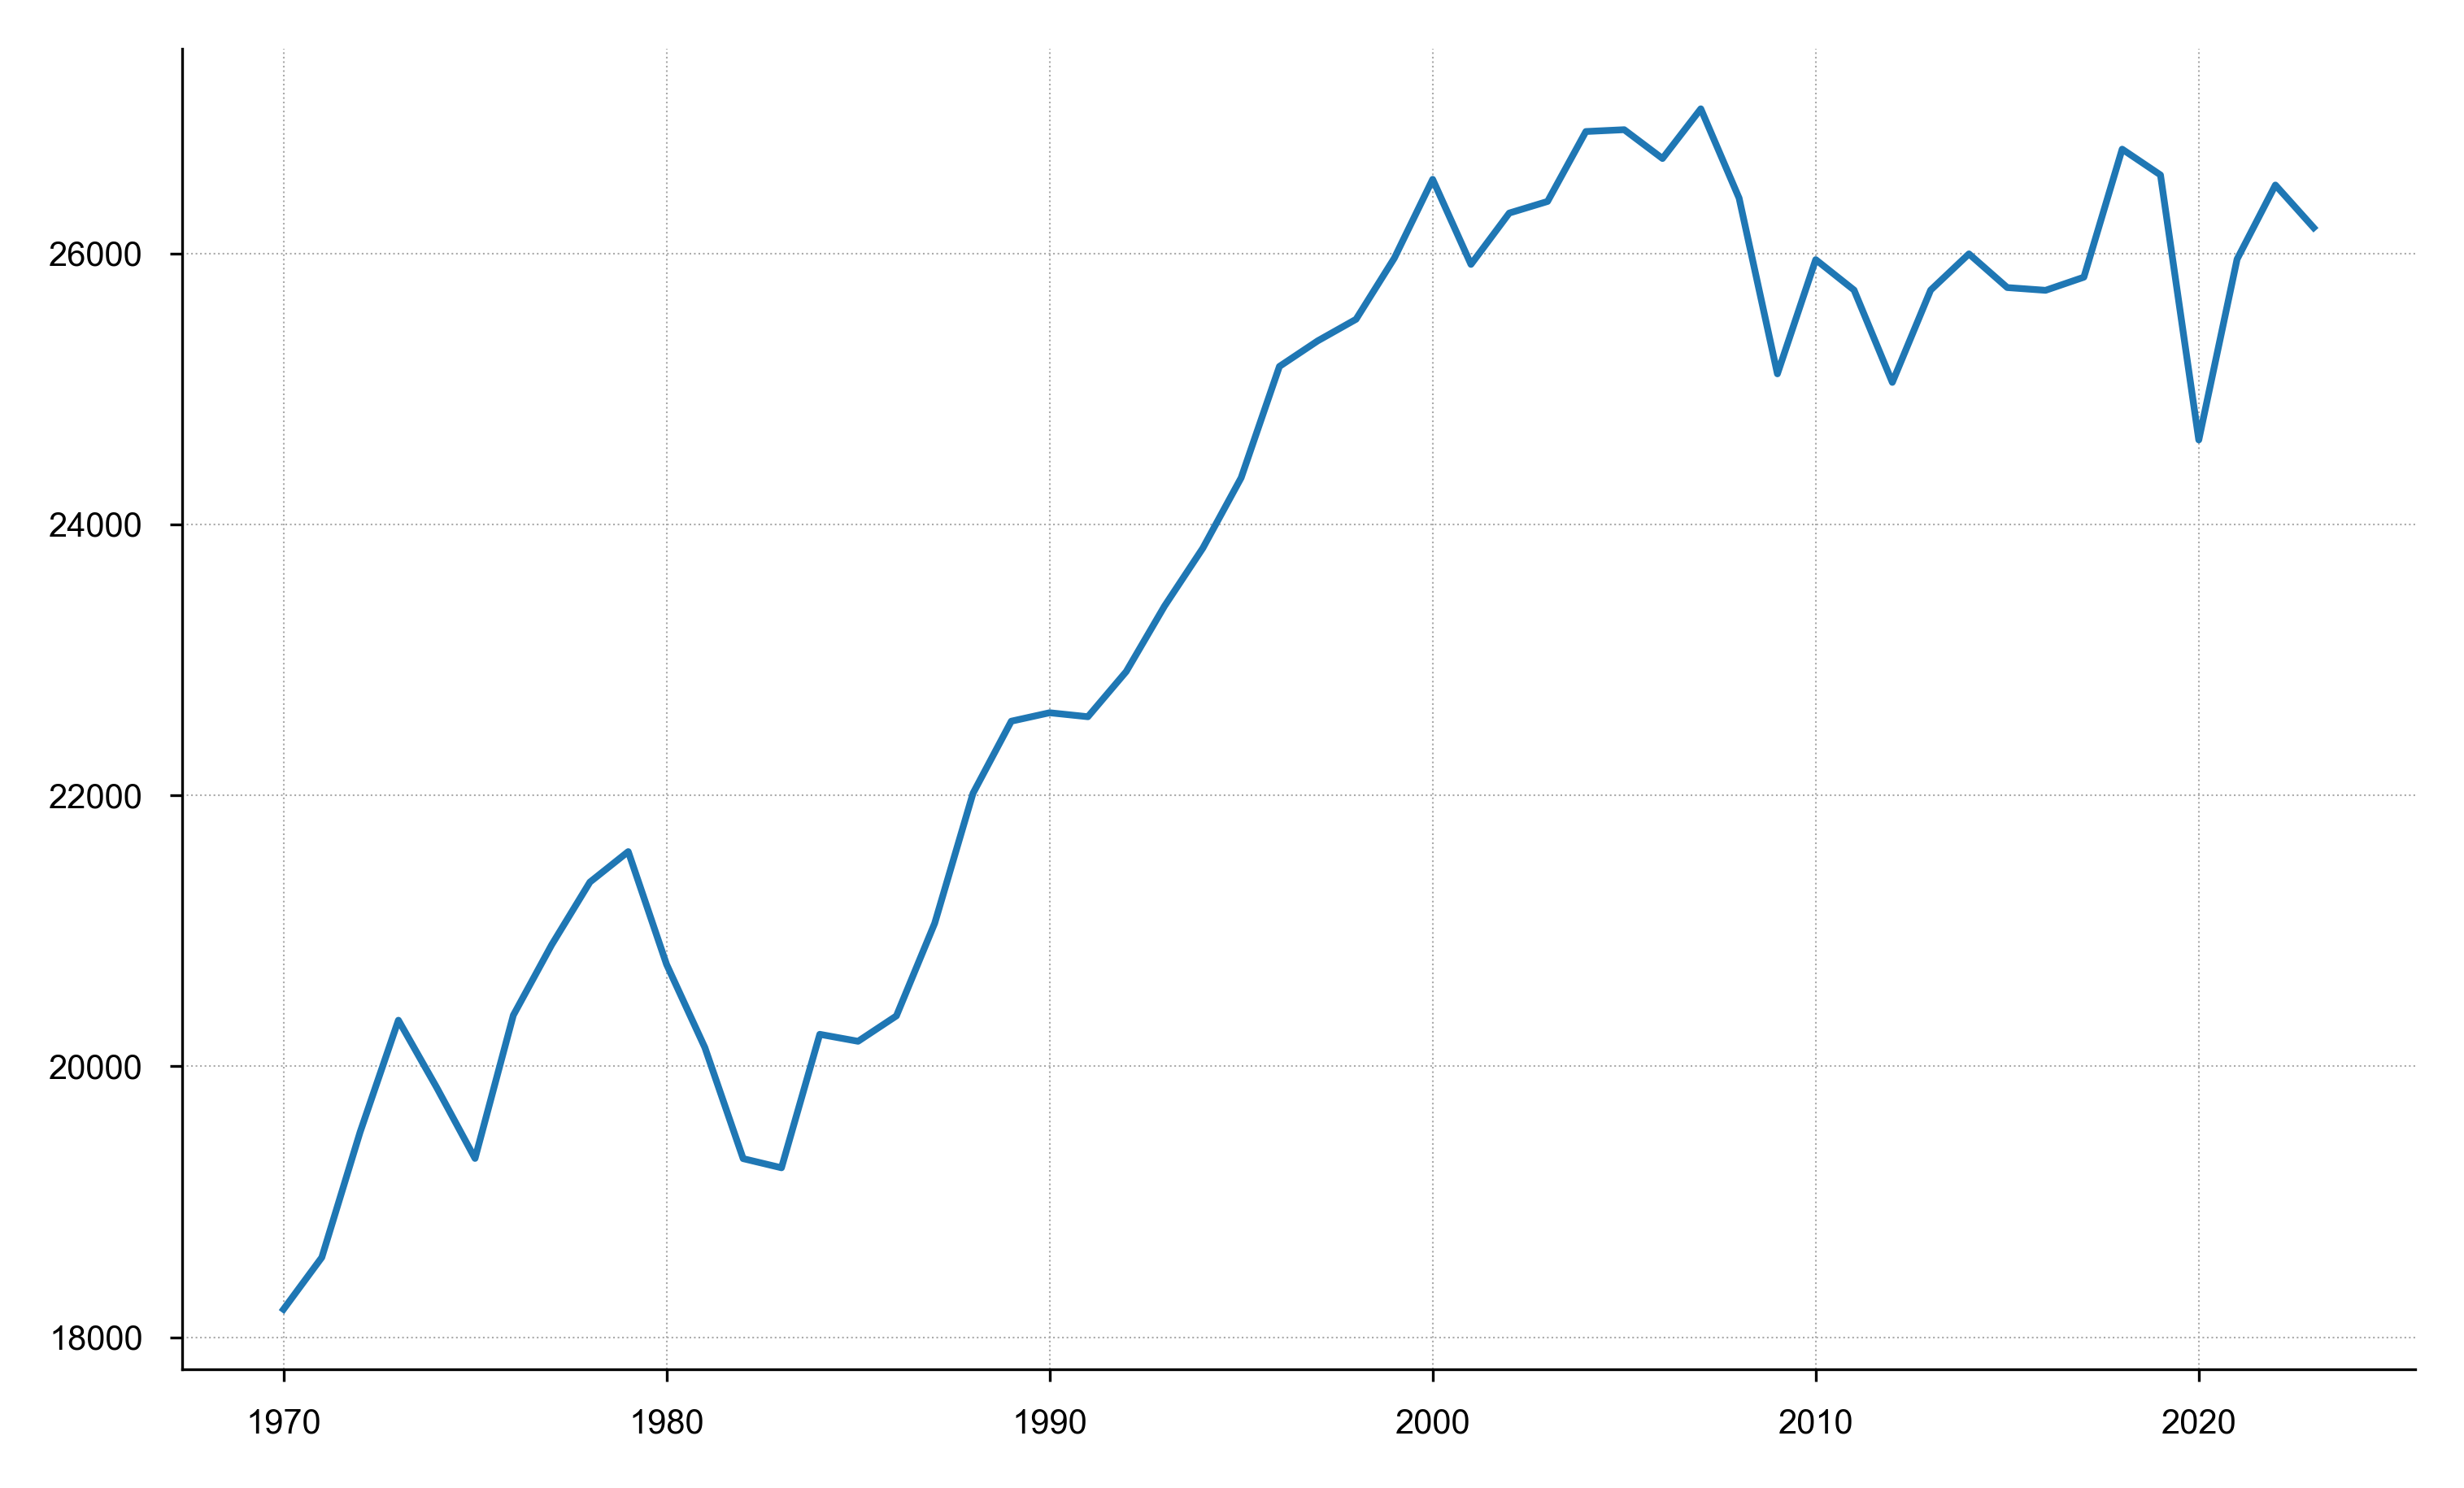

In [146]:
# plot year vs demand
plt.figure(figsize=(10, 6))
plt.plot(
    us_df["year"],
    us_df["primary_energy_consumption"],
    # label="Total Energy Demand",
    # color="blue",
    linewidth=2,
)
plt.gca().set_axisbelow(True)
plt.show()

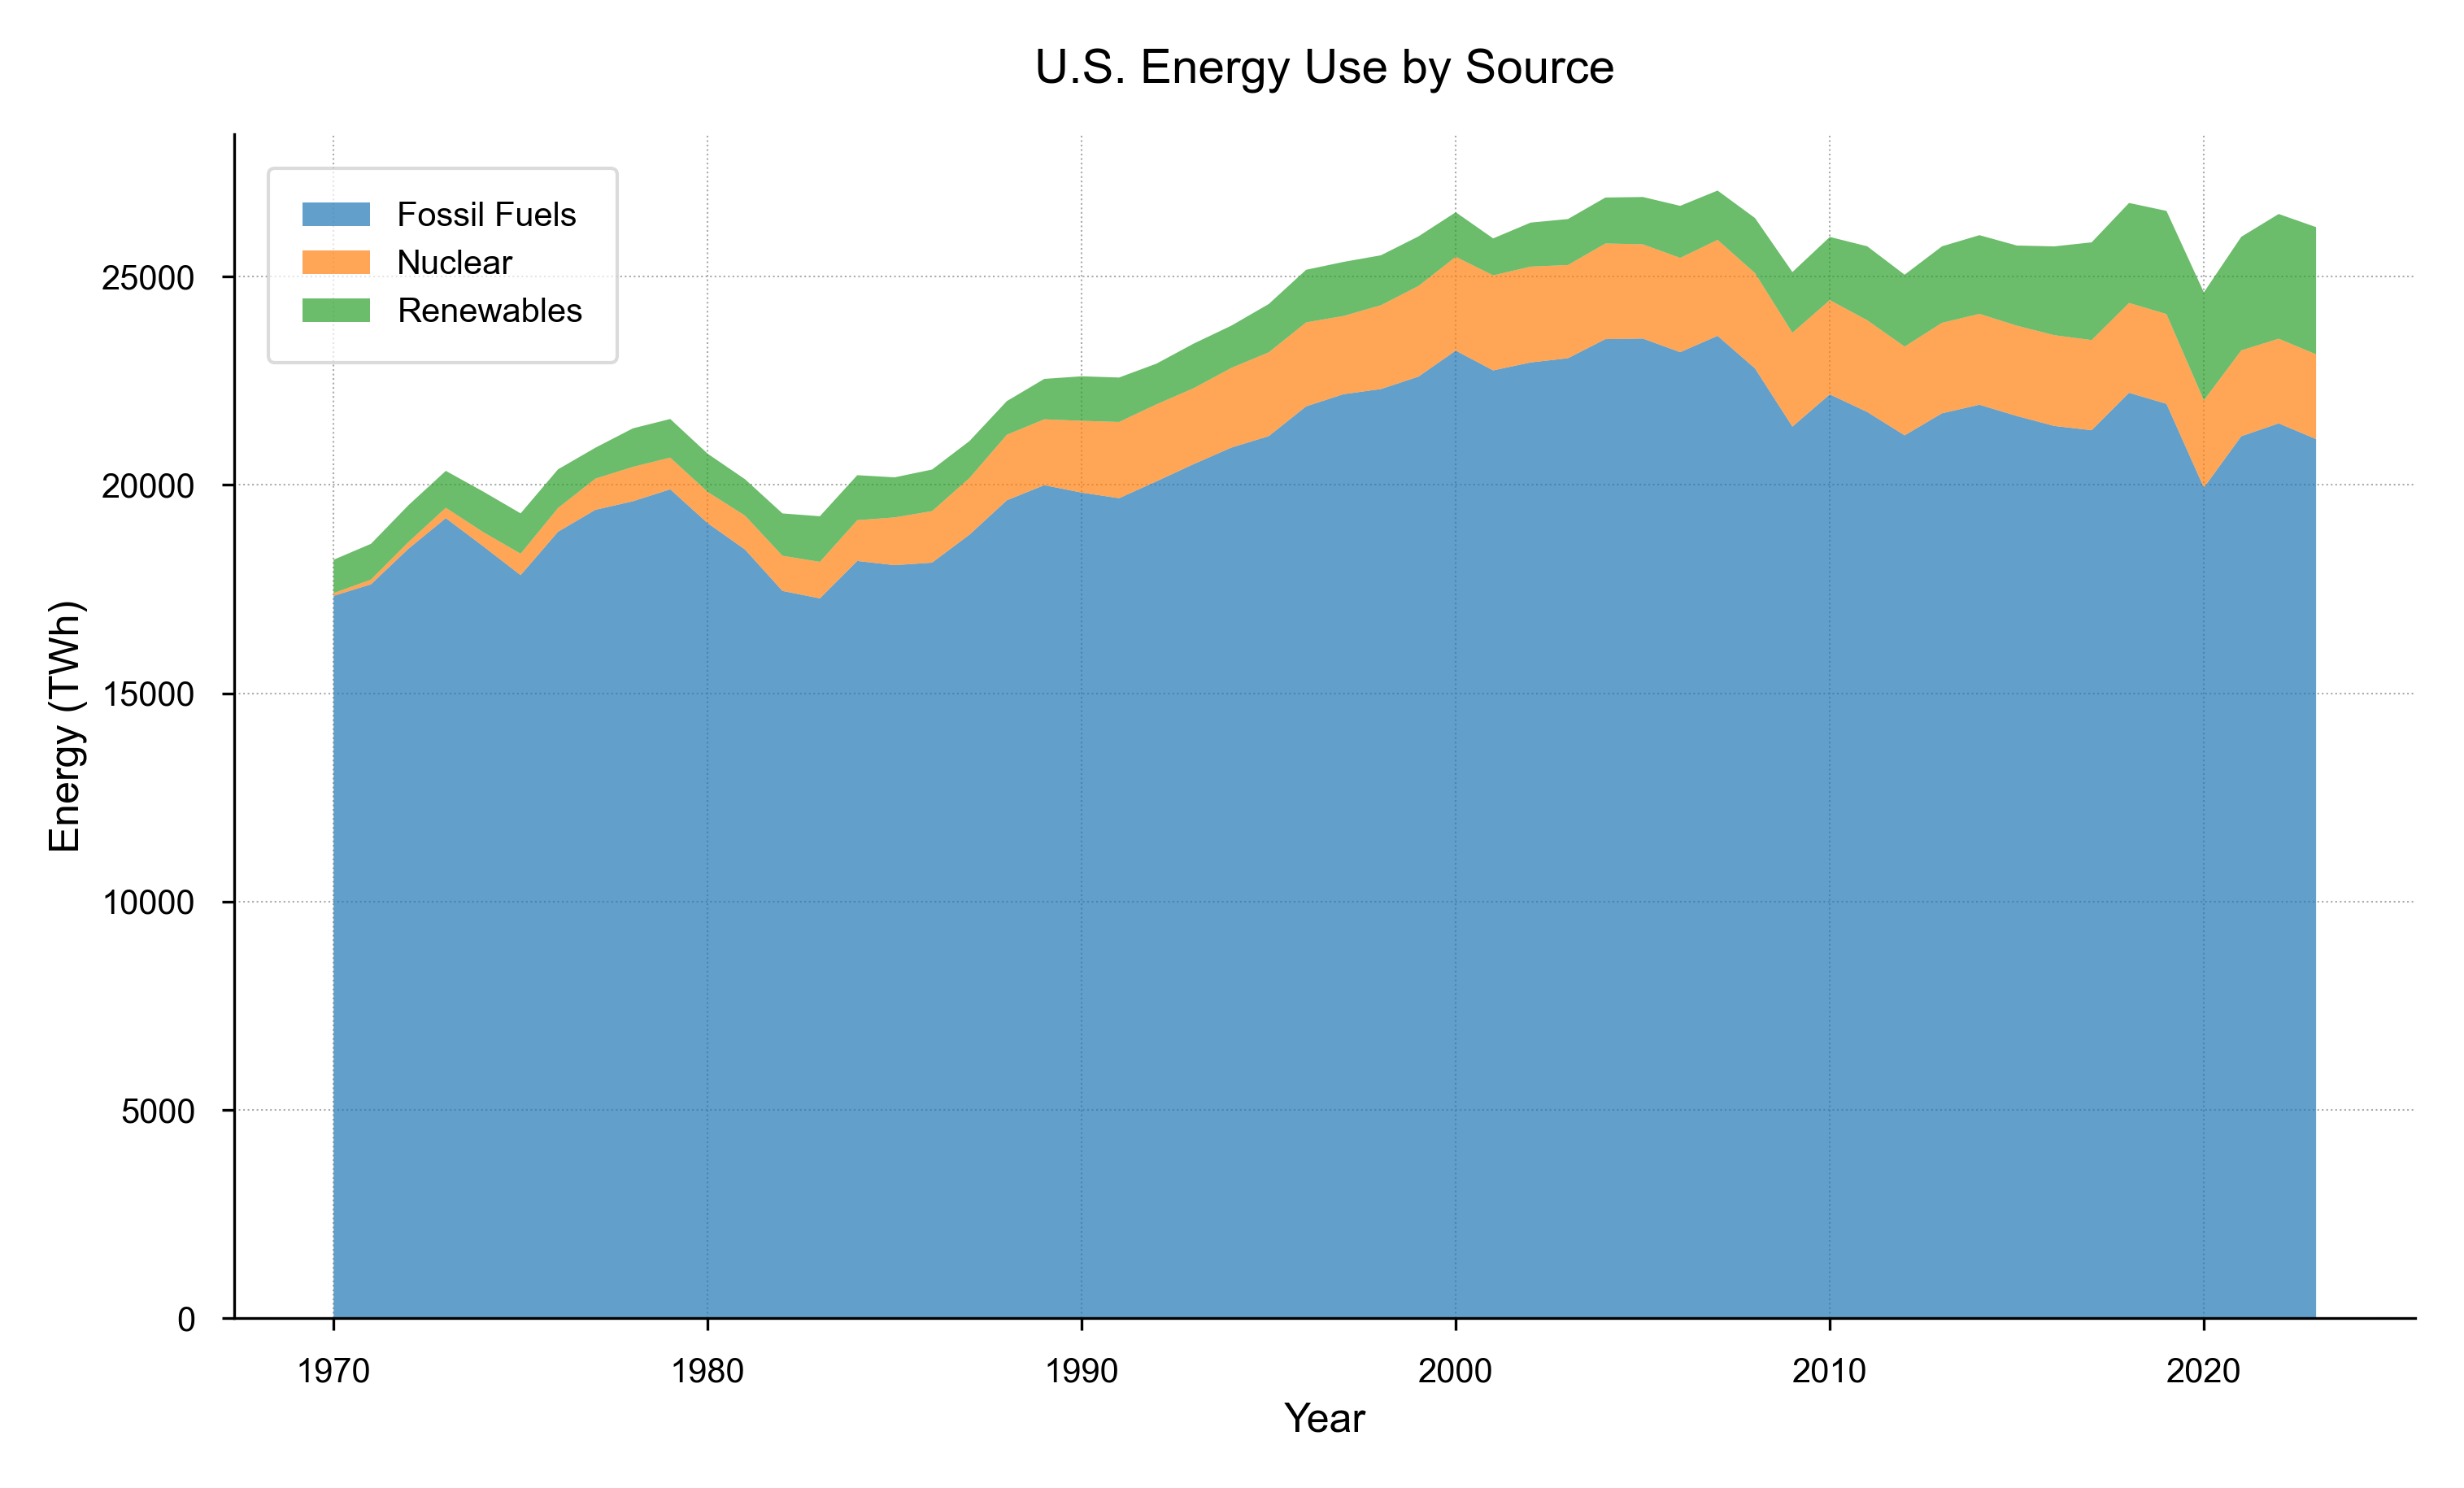

In [155]:
plt.figure(figsize=(10, 6))


# plt.plot(
#     us_df["year"],
#     us_df["primary_energy_consumption"],
#     # label="Total Energy Demand",
#     # color="blue",
#     linewidth=2,
# )
plt.stackplot(
    us_df["year"], 
    us_df["fossil_fuel_consumption"],
    us_df["nuclear_consumption"],
    us_df["renewables_consumption"],
    # us_df["coal_consumption"],
    labels=["Fossil Fuels", "Nuclear", "Renewables", "", ""], 
    # colors=['skyblue', 'lightcoral', 'lightgreen'], 
    alpha=0.7
)
plt.xlabel("Year")
plt.ylabel("Energy (TWh)")
plt.title("U.S. Energy Use by Source")
plt.legend(
    loc="upper left",
    frameon=True,
    # fancybox=True,
    # shadow=True,
    framealpha=0.7,
    borderpad=1,
)

plt.gca().set_axisbelow(True)
plt.show()

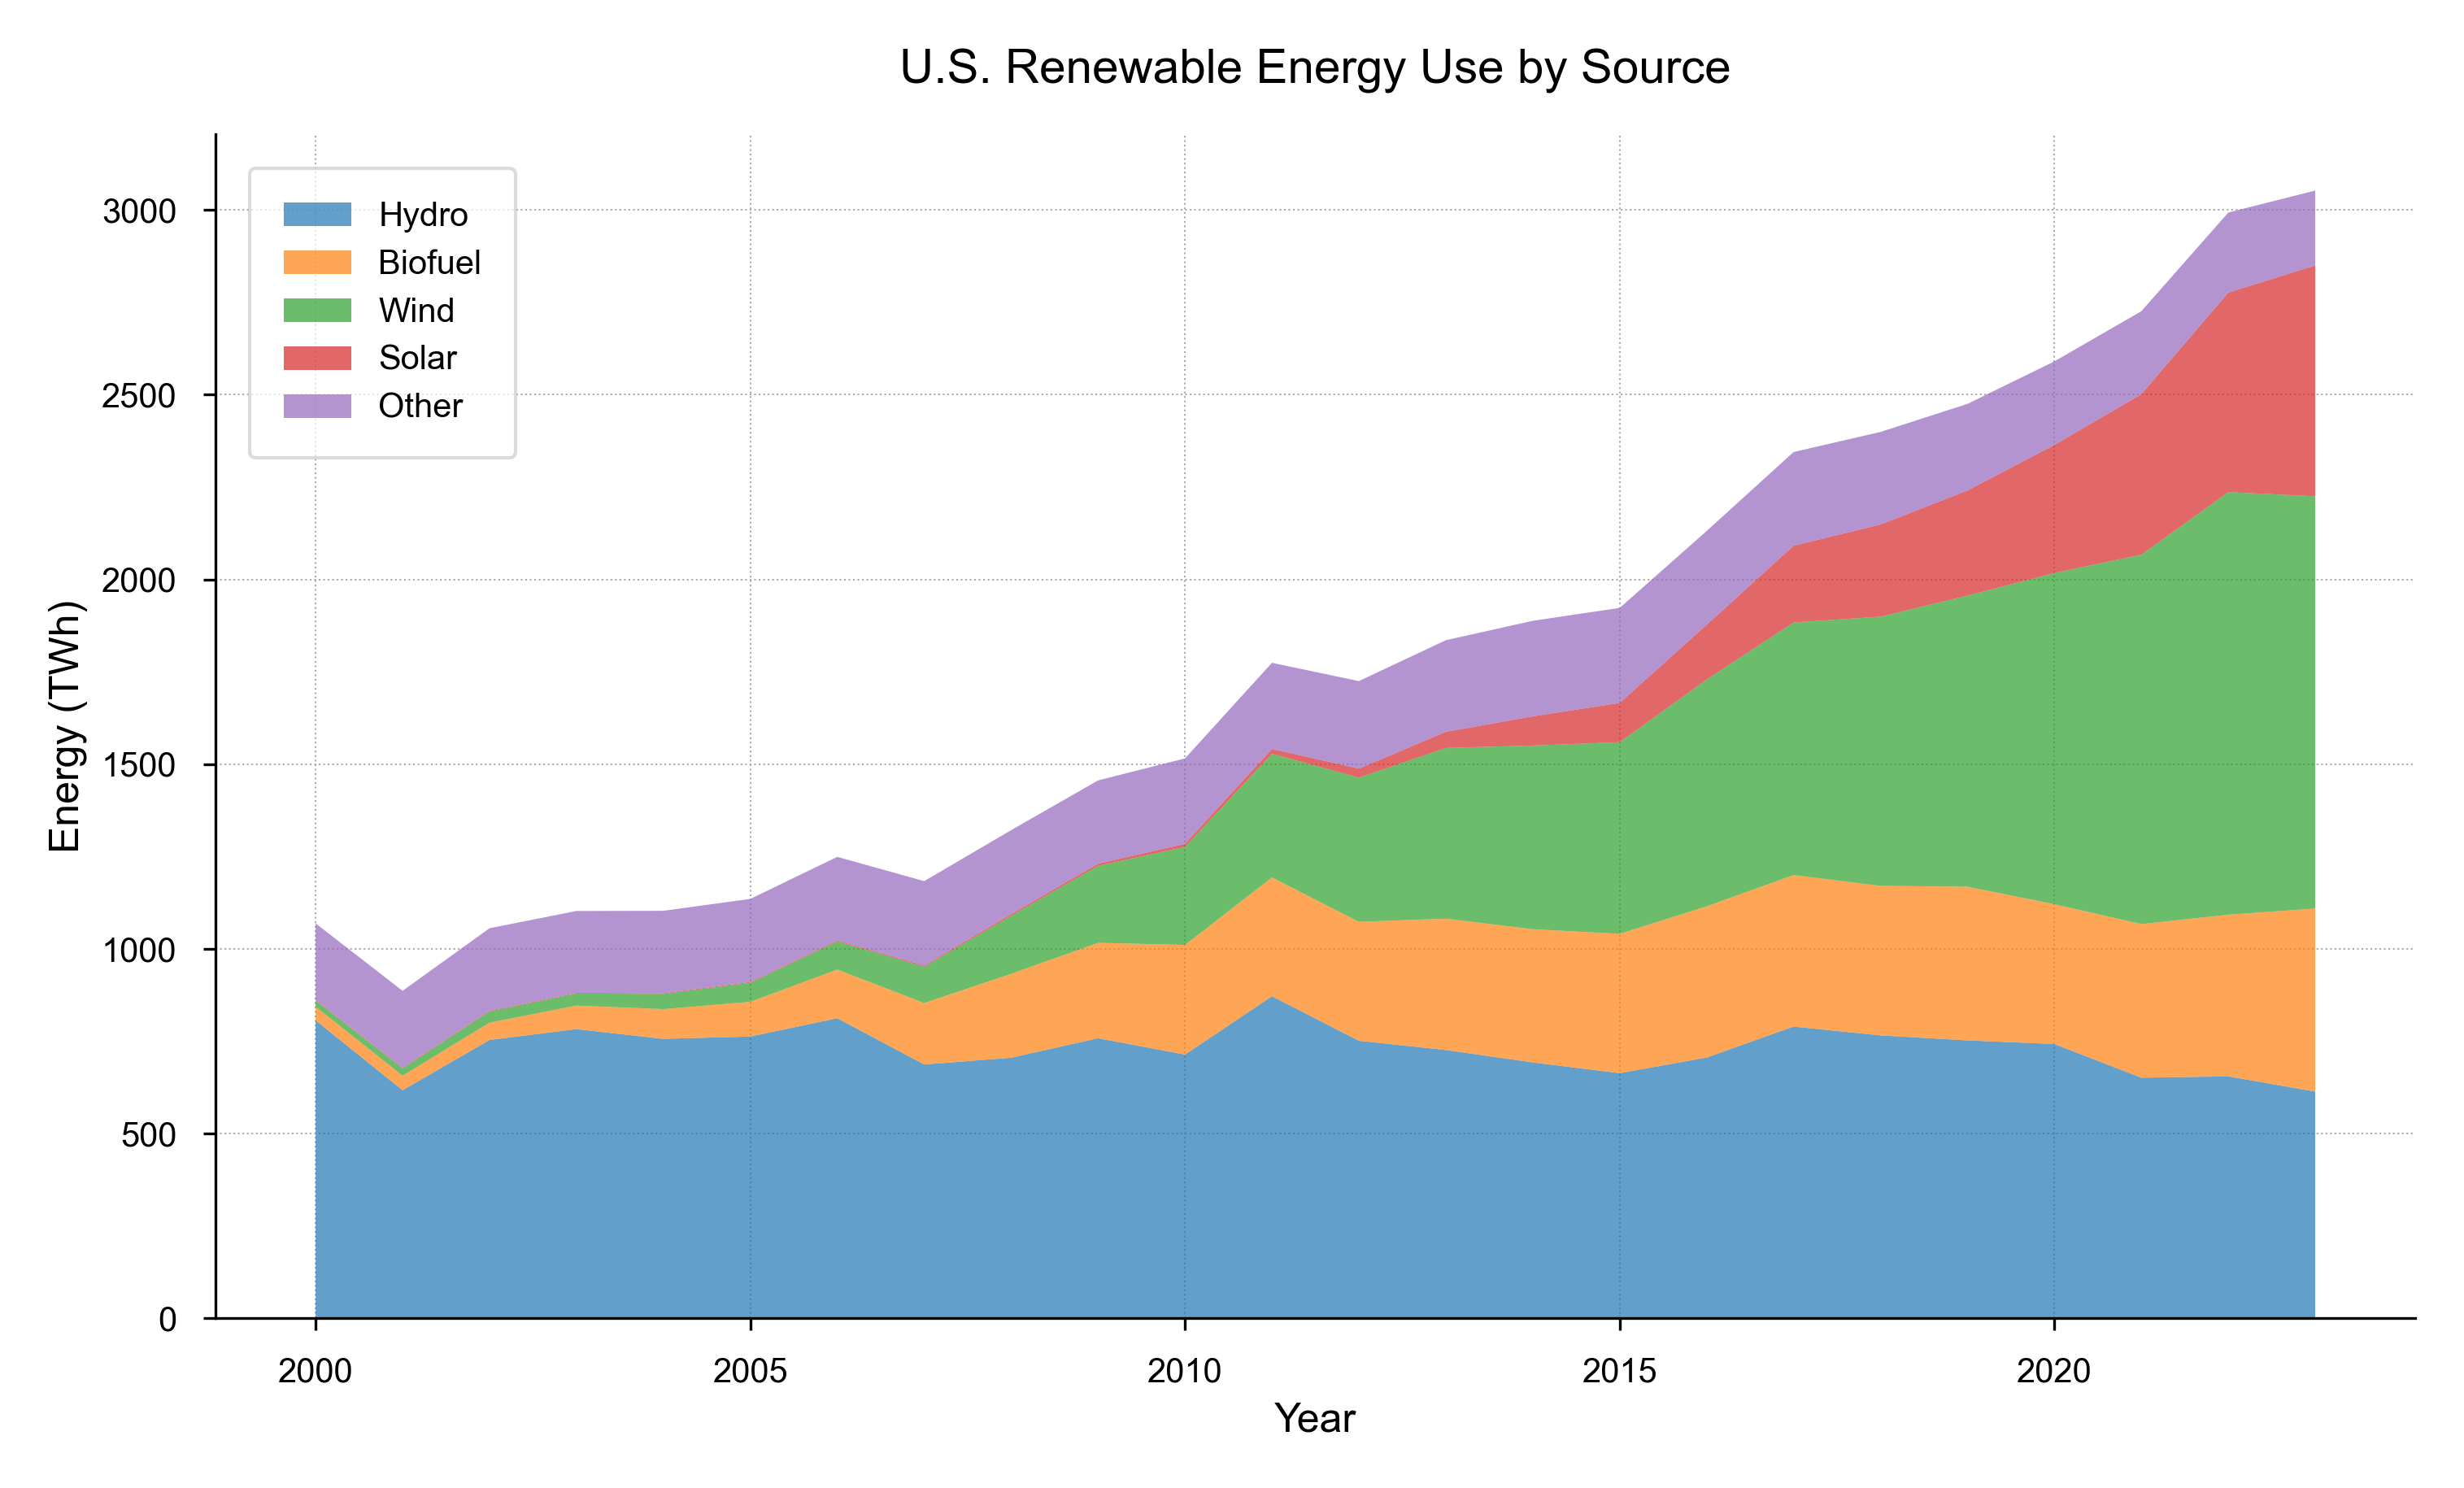

In [159]:
renewables_us_df = us_df[us_df["year"] >= 2000]

plt.figure(figsize=(10, 6))

# plt.plot(
#     renewables_us_df["year"],
#     renewables_us_df["renewables_consumption"],
#     # label="Total Energy Demand",
#     # color="blue",
#     linewidth=2,
# )
plt.stackplot(
    renewables_us_df["year"], 
    renewables_us_df["hydro_consumption"],
    renewables_us_df["biofuel_consumption"],
    renewables_us_df["wind_consumption"],
    renewables_us_df["solar_consumption"],
    renewables_us_df["other_renewable_consumption"],
    # us_df["coal_consumption"],
    labels=["Hydro", "Biofuel", "Wind", "Solar", "Other"], 
    # colors=['skyblue', 'lightcoral', 'lightgreen'], 
    alpha=0.7
)
plt.xlabel("Year")
plt.ylabel("Energy (TWh)")
plt.title("U.S. Renewable Energy Use by Source")
plt.legend(
    loc="upper left",
    frameon=True,
    # fancybox=True,
    # shadow=True,
    framealpha=0.7,
    borderpad=1,
)

plt.gca().set_axisbelow(True)
plt.show()

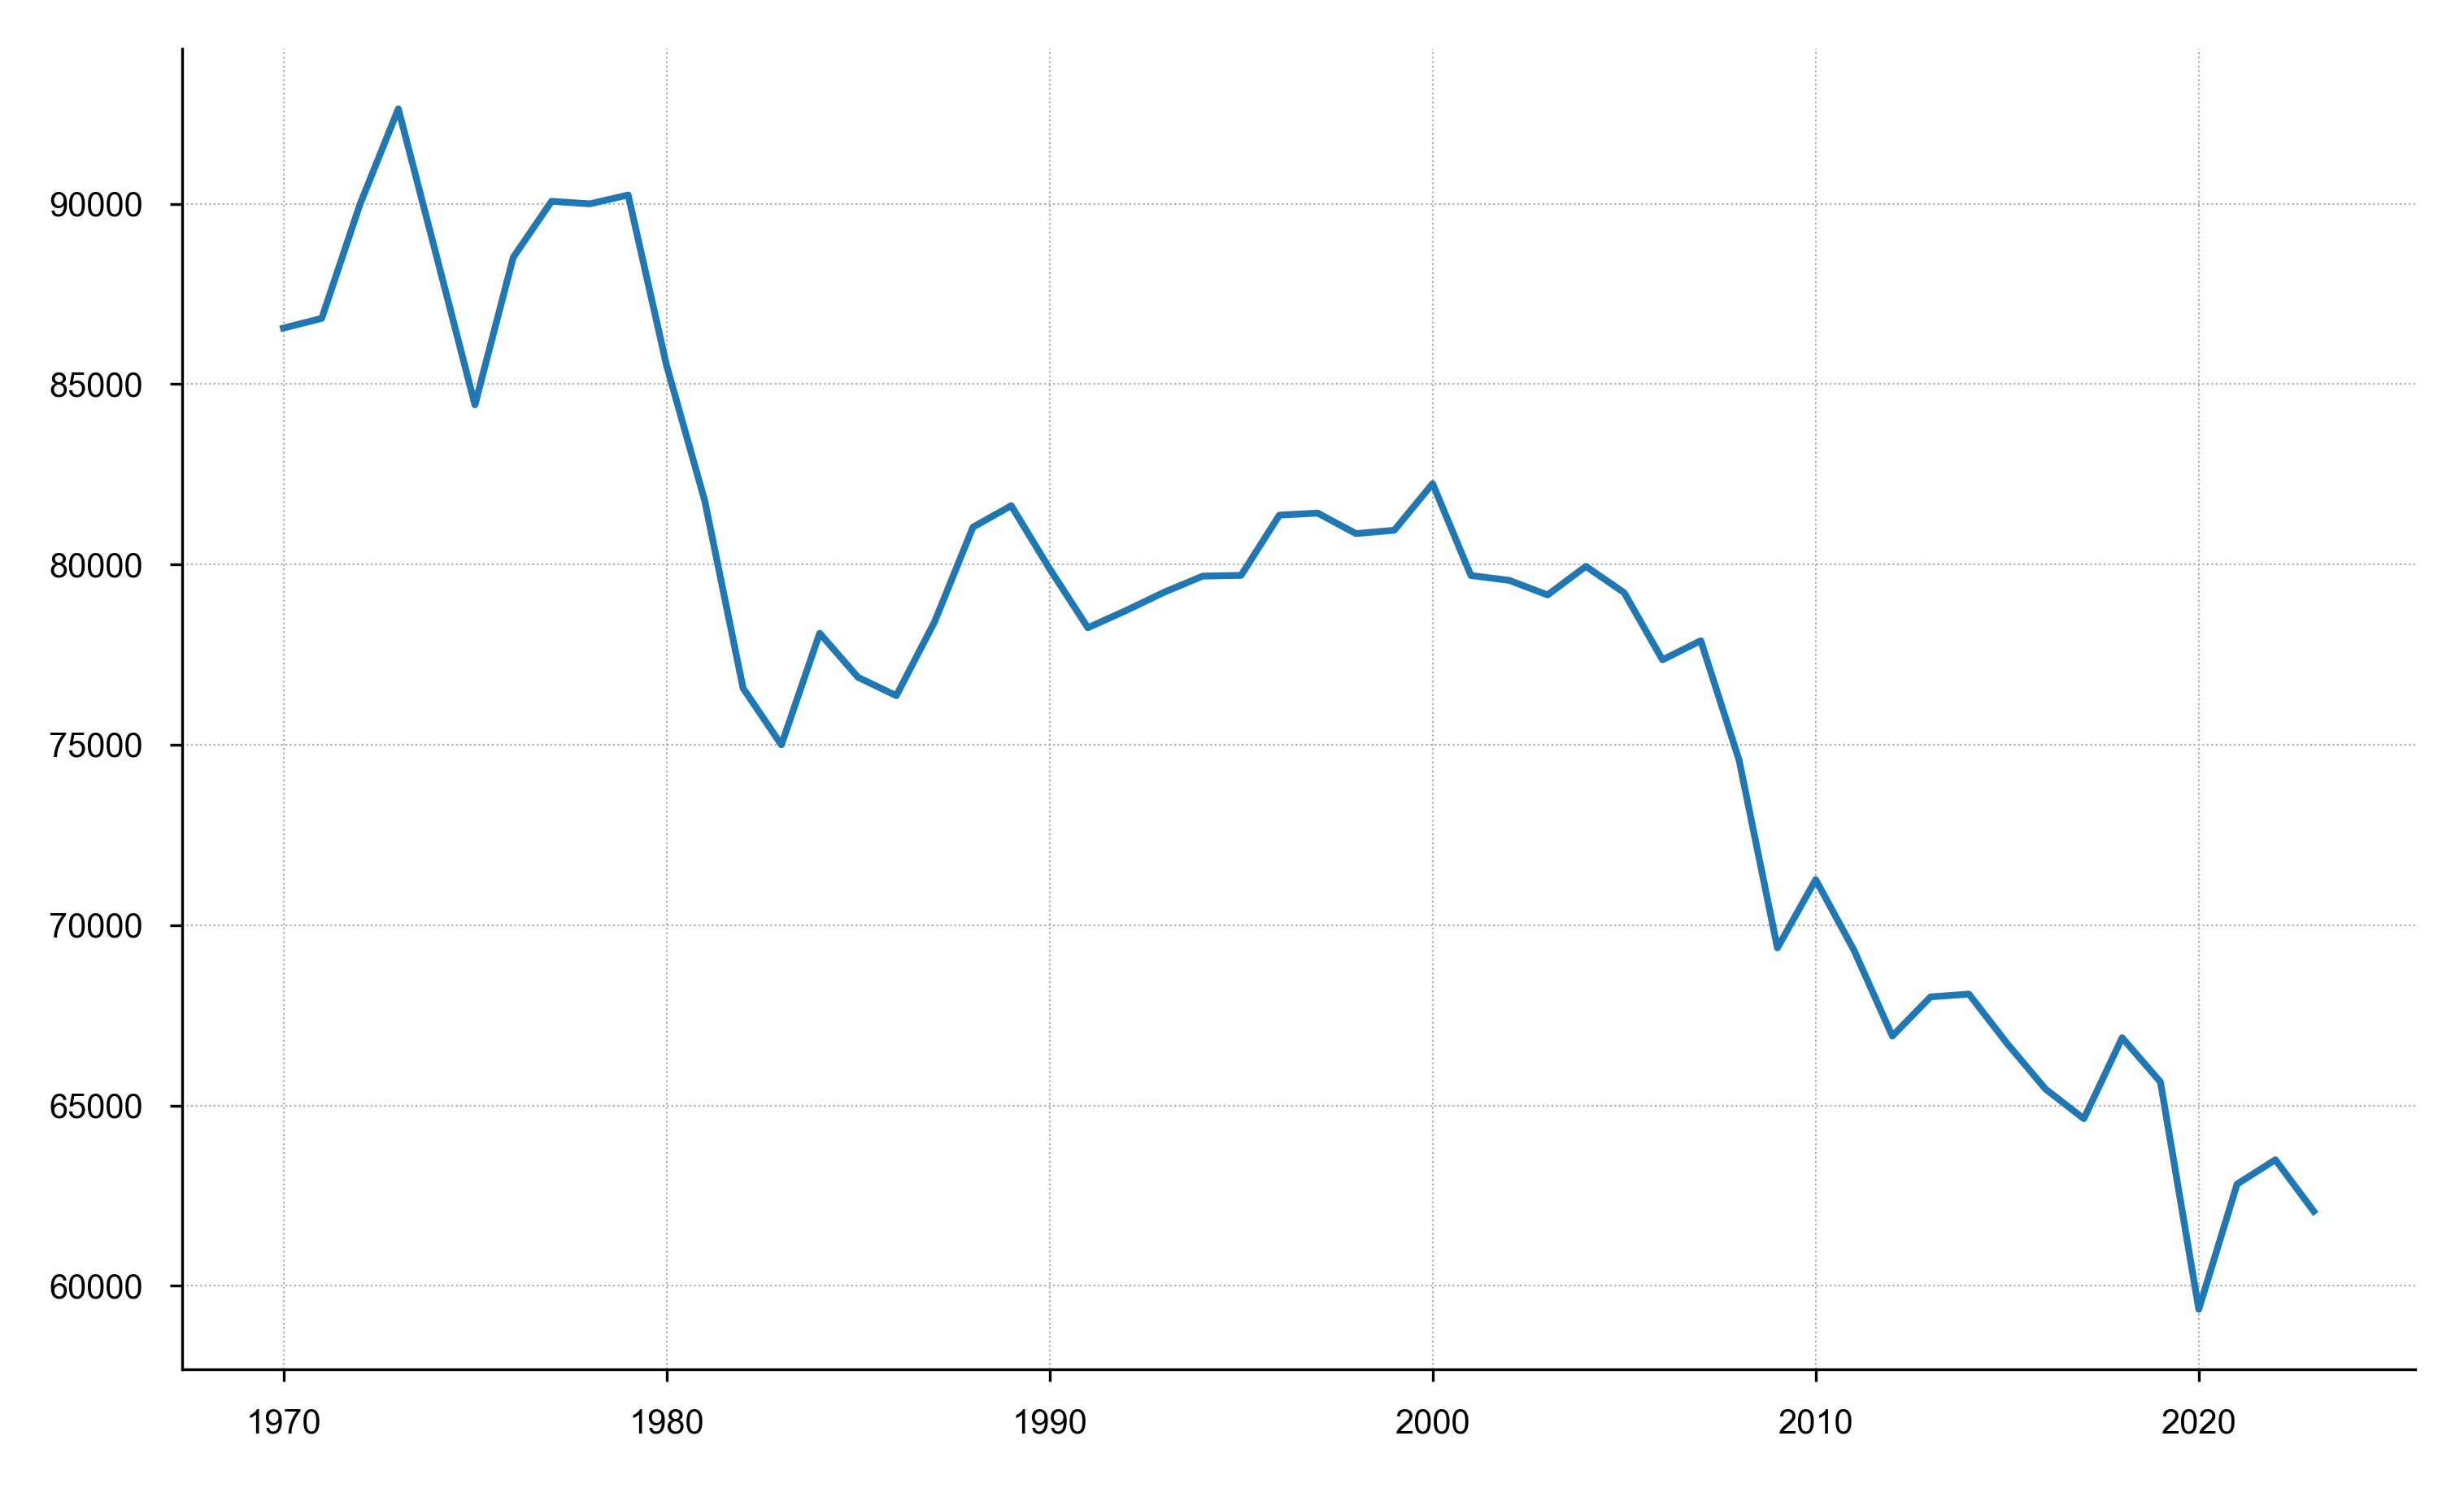

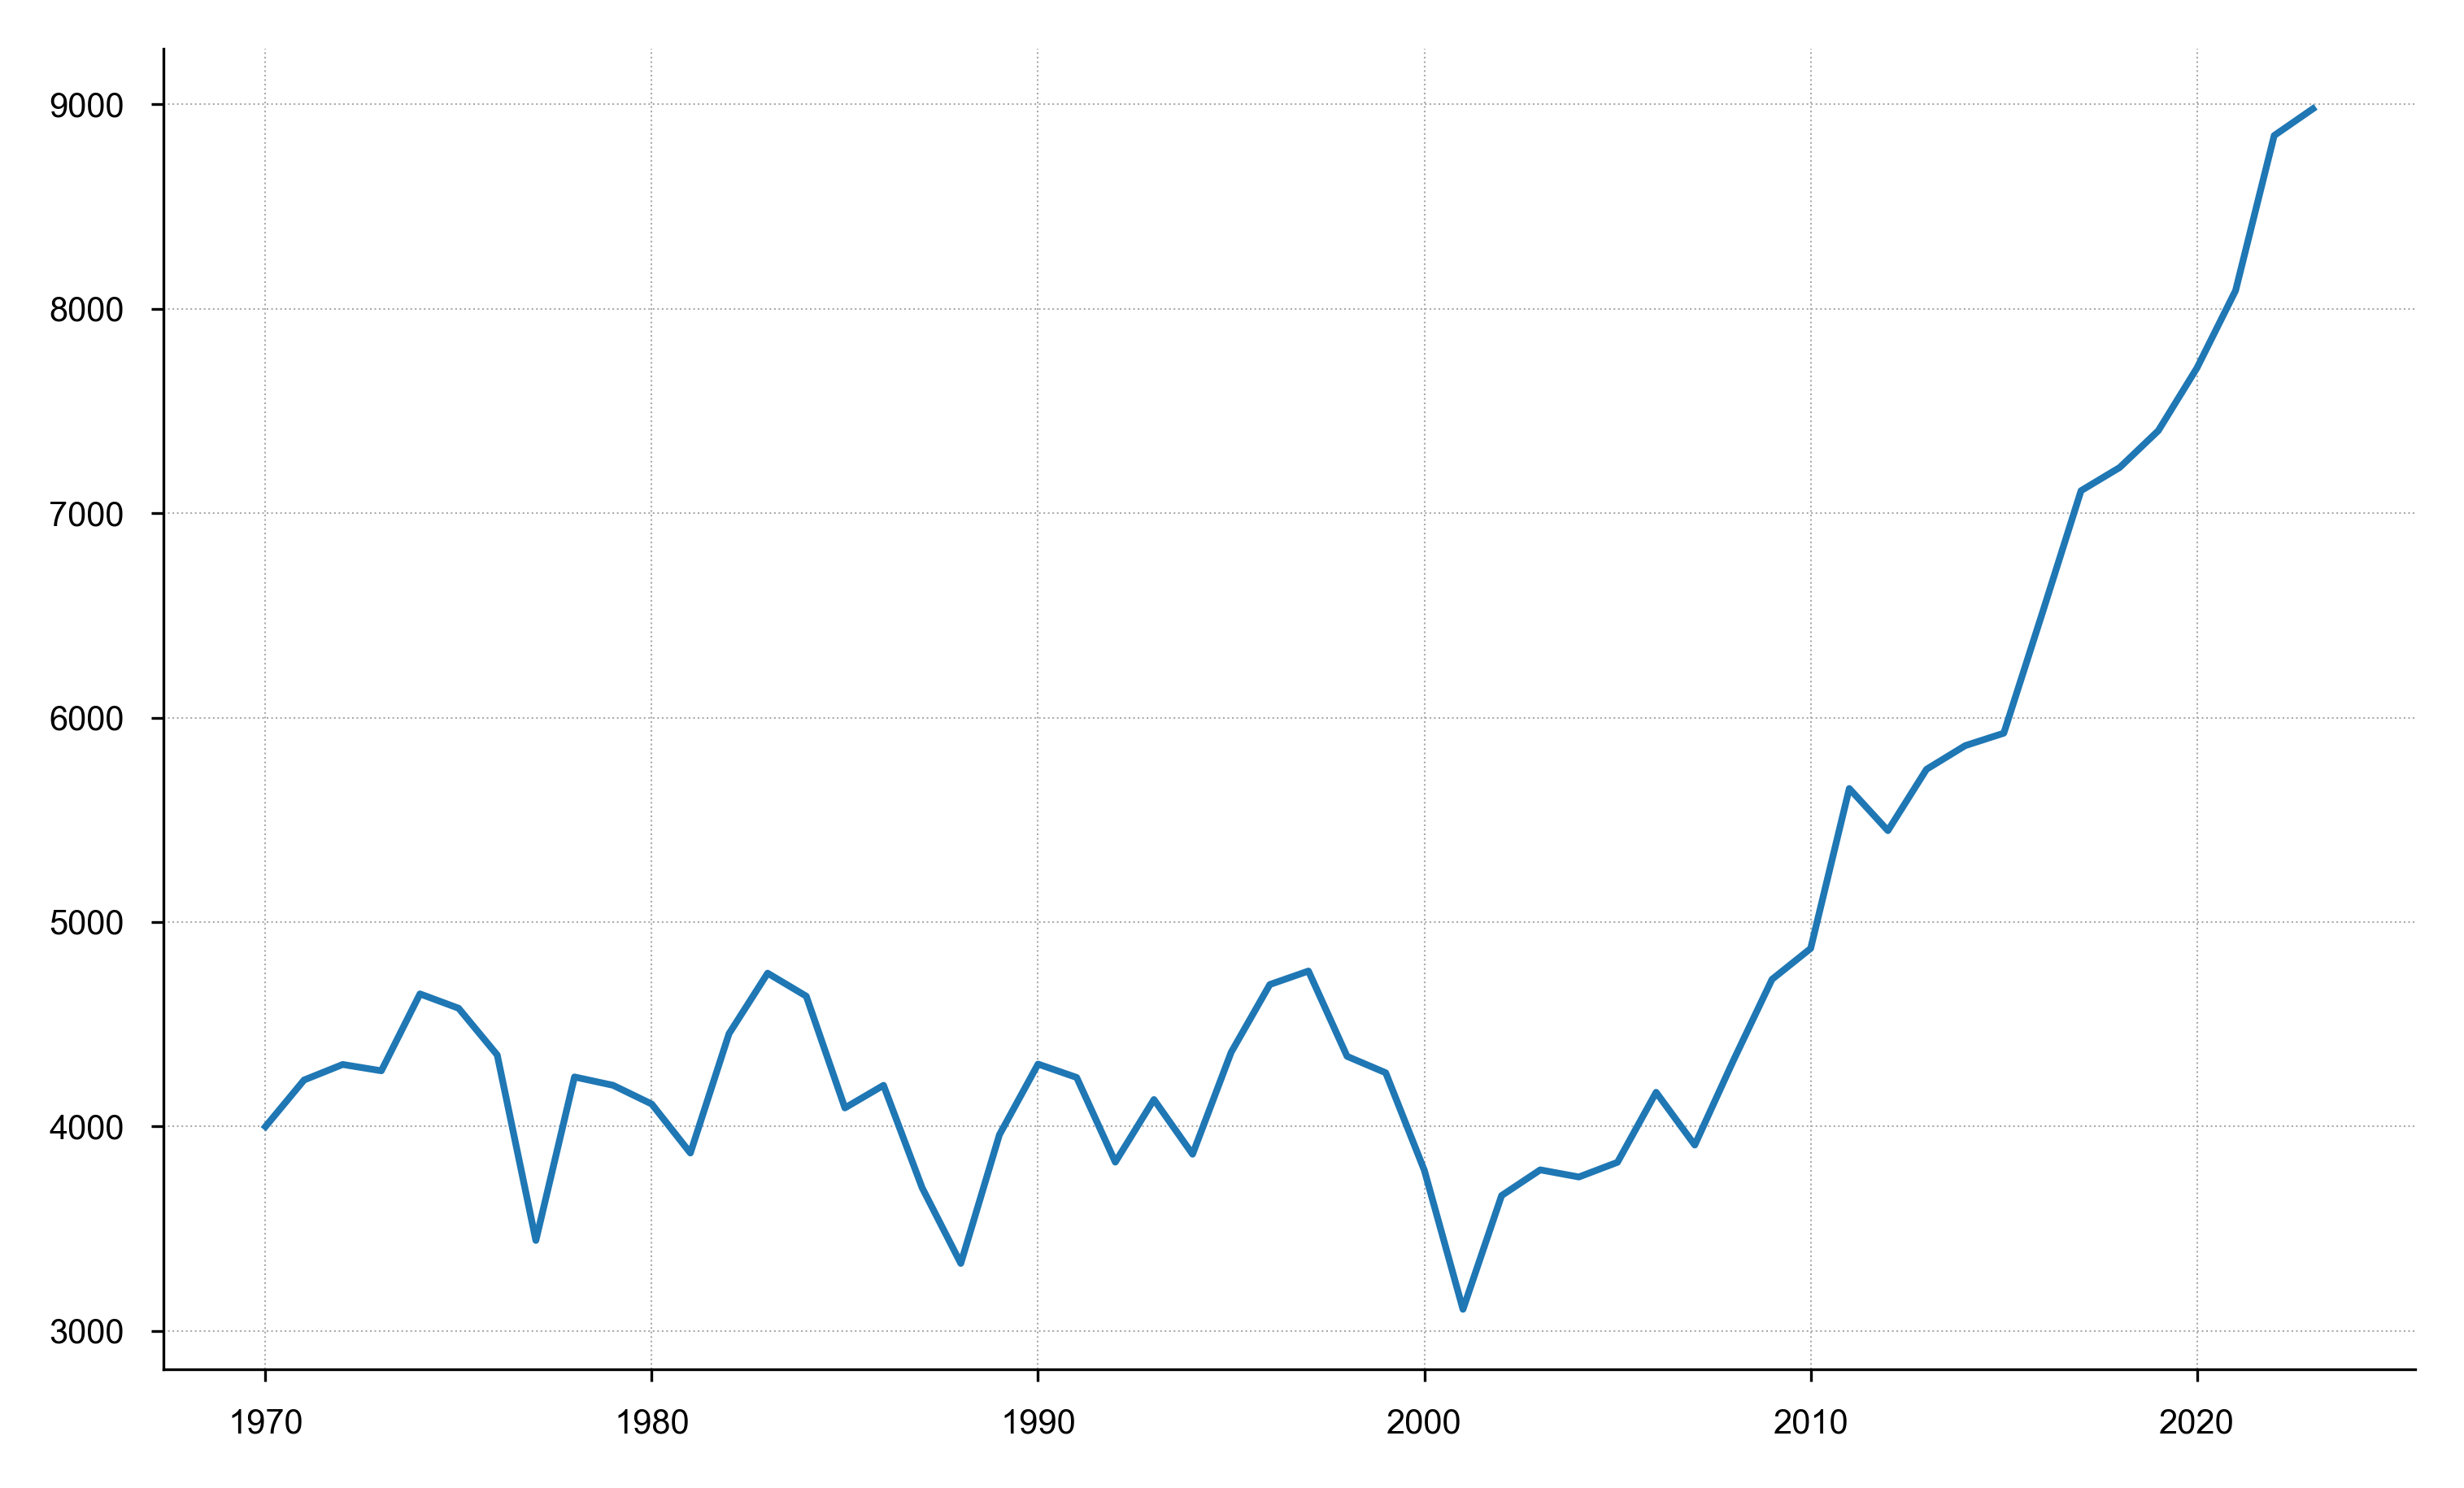

In [149]:
plt.figure(figsize=(10, 6))

plt.plot(
    us_df["year"],
    us_df["fossil_energy_per_capita"],
    # us_df["renewables_energy_per_capita"],
    # label="Total Energy Demand",
    # color="blue",
    linewidth=2,
)

plt.gca().set_axisbelow(True)
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(
    us_df["year"],
    # us_df["fossil_energy_per_capita"],
    us_df["renewables_energy_per_capita"],
    # label="Total Energy Demand",
    # color="blue",
    linewidth=2,
)

plt.gca().set_axisbelow(True)
plt.show()

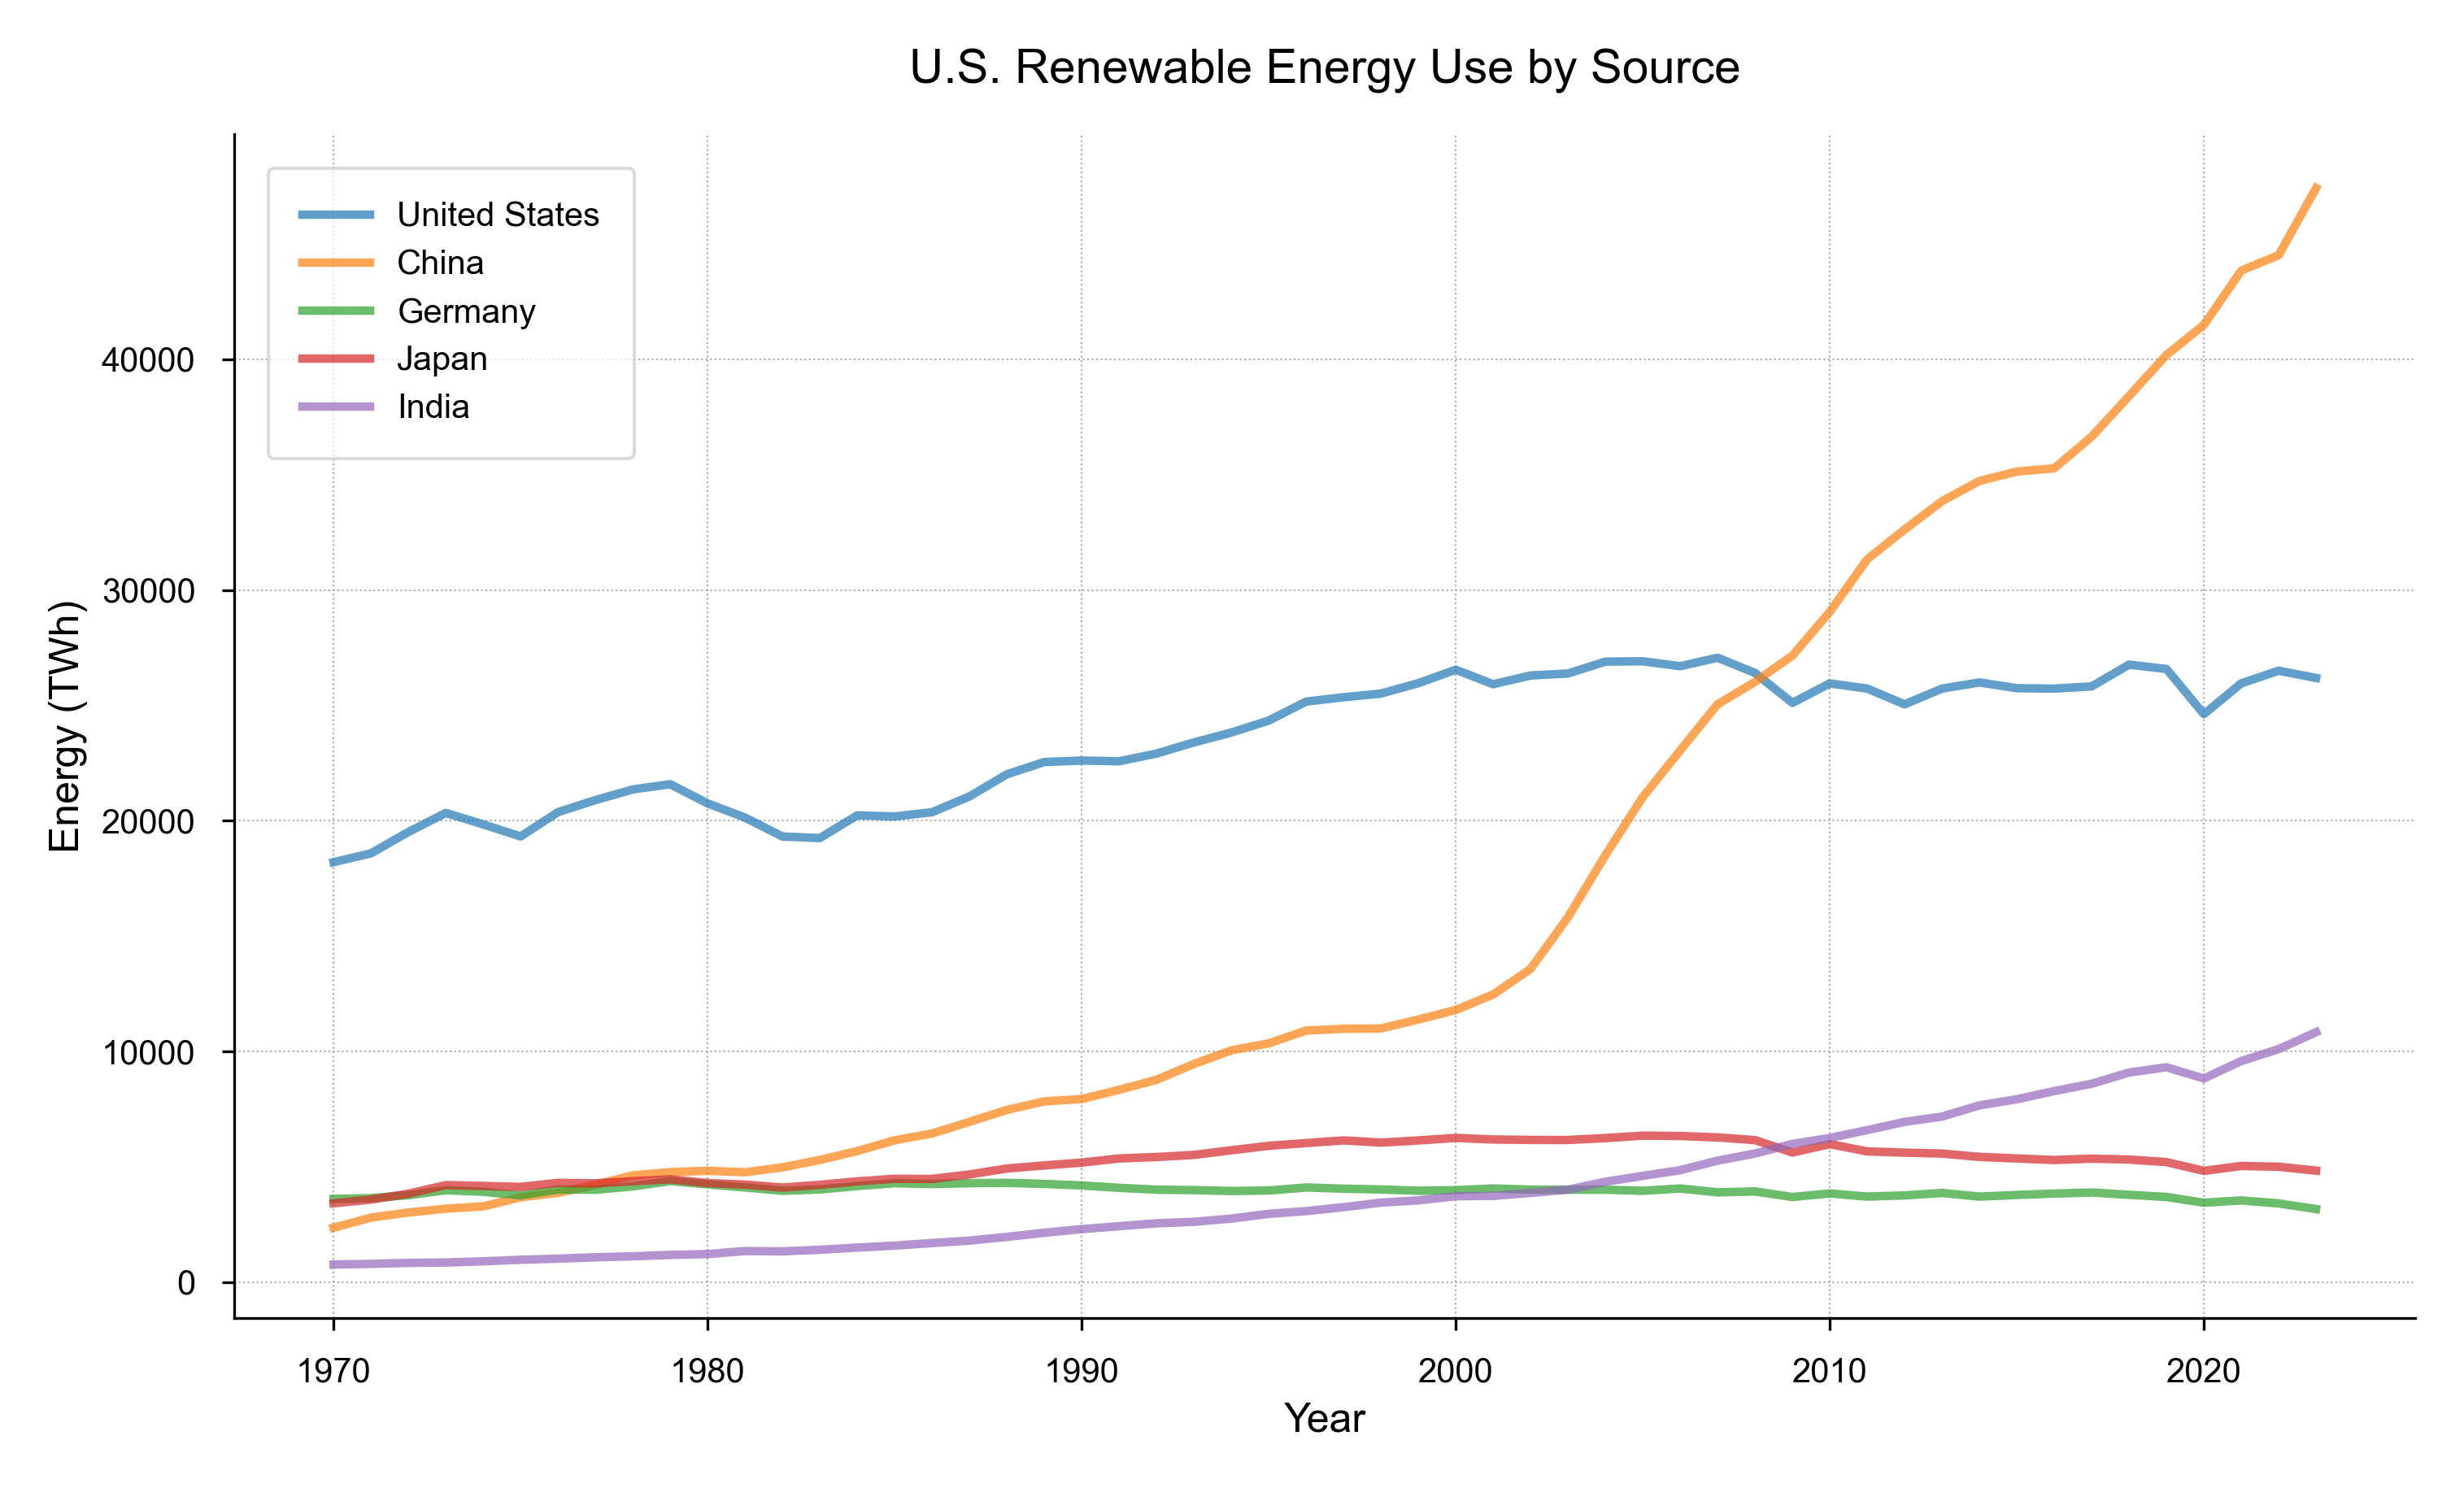

In [160]:
plt.figure(figsize=(10, 6))

plt.plot(
    df[df["country"] == "United States"]["year"],
    df[df["country"] == "United States"]["primary_energy_consumption"],
    # label="Total Energy Demand",
    # color="blue",
    # linewidth=2,
    alpha=0.7,
    label="United States",
)
plt.plot(
    df[df["country"] == "China"]["year"],
    df[df["country"] == "China"]["primary_energy_consumption"],
    alpha=0.7,
    label="China",
)
plt.plot(
    df[df["country"] == "Germany"]["year"],
    df[df["country"] == "Germany"]["primary_energy_consumption"],
    alpha=0.7,
    label="Germany",
)
plt.plot(
    df[df["country"] == "Japan"]["year"],
    df[df["country"] == "Japan"]["primary_energy_consumption"],
    alpha=0.7,
    label="Japan",
)
plt.plot(
    df[df["country"] == "India"]["year"],
    df[df["country"] == "India"]["primary_energy_consumption"],
    alpha=0.7,
    label="India",
)

plt.xlabel("Year")
plt.ylabel("Energy (TWh)")
plt.title("U.S. Renewable Energy Use by Source")
plt.legend(
    loc="upper left",
    frameon=True,
    # fancybox=True,
    # shadow=True,
    framealpha=0.7,
    borderpad=1,
)

plt.gca().set_axisbelow(True)
plt.show()

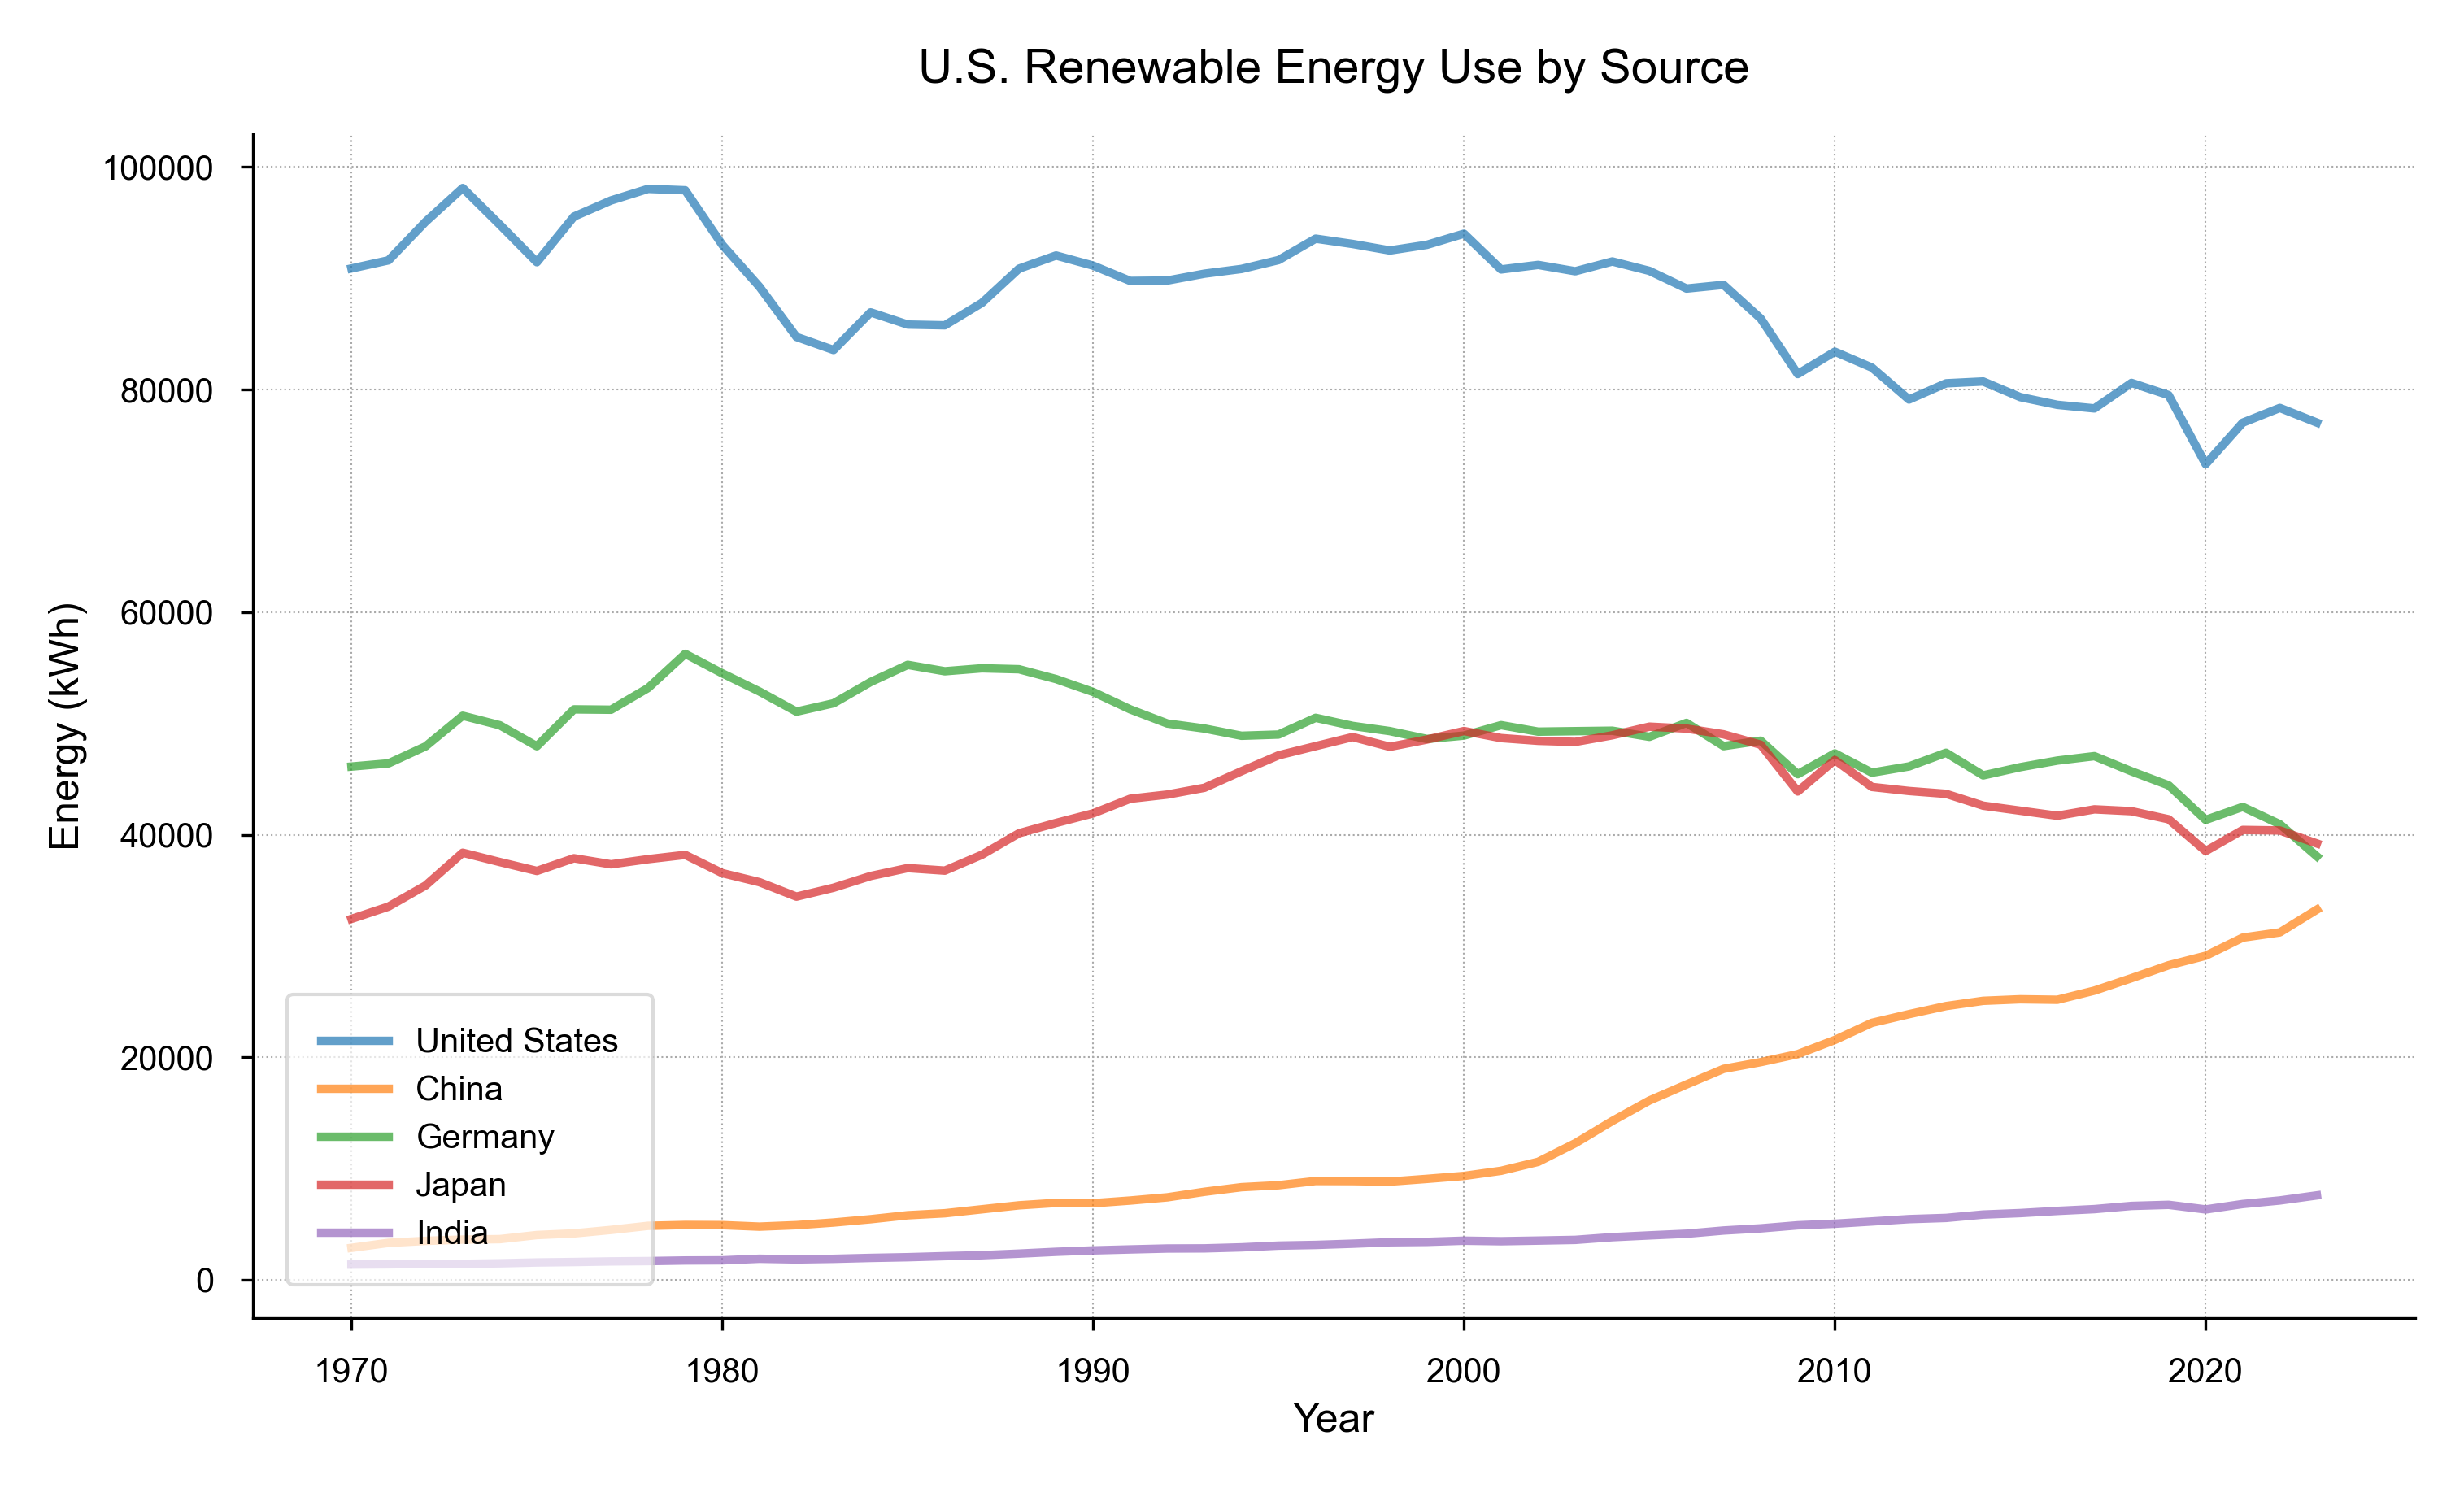

In [161]:
plt.figure(figsize=(10, 6))

plt.plot(
    df[df["country"] == "United States"]["year"],
    df[df["country"] == "United States"]["energy_per_capita"],
    # label="Total Energy Demand",
    # color="blue",
    # linewidth=2,
    alpha=0.7,
    label="United States",
)
plt.plot(
    df[df["country"] == "China"]["year"],
    df[df["country"] == "China"]["energy_per_capita"],
    alpha=0.7,
    label="China",
)
plt.plot(
    df[df["country"] == "Germany"]["year"],
    df[df["country"] == "Germany"]["energy_per_capita"],
    alpha=0.7,
    label="Germany",
)
plt.plot(
    df[df["country"] == "Japan"]["year"],
    df[df["country"] == "Japan"]["energy_per_capita"],
    alpha=0.7,
    label="Japan",
)
plt.plot(
    df[df["country"] == "India"]["year"],
    df[df["country"] == "India"]["energy_per_capita"],
    alpha=0.7,
    label="India",
)

plt.xlabel("Year")
plt.ylabel("Energy (kWh)")
plt.title("U.S. Renewable Energy Use by Source")
# plt.legend(loc="lower left")
plt.legend(
    loc="lower left",
    frameon=True,
    # fancybox=True,
    # shadow=True,
    framealpha=0.7,
    borderpad=1,
)

plt.gca().set_axisbelow(True)
plt.show()

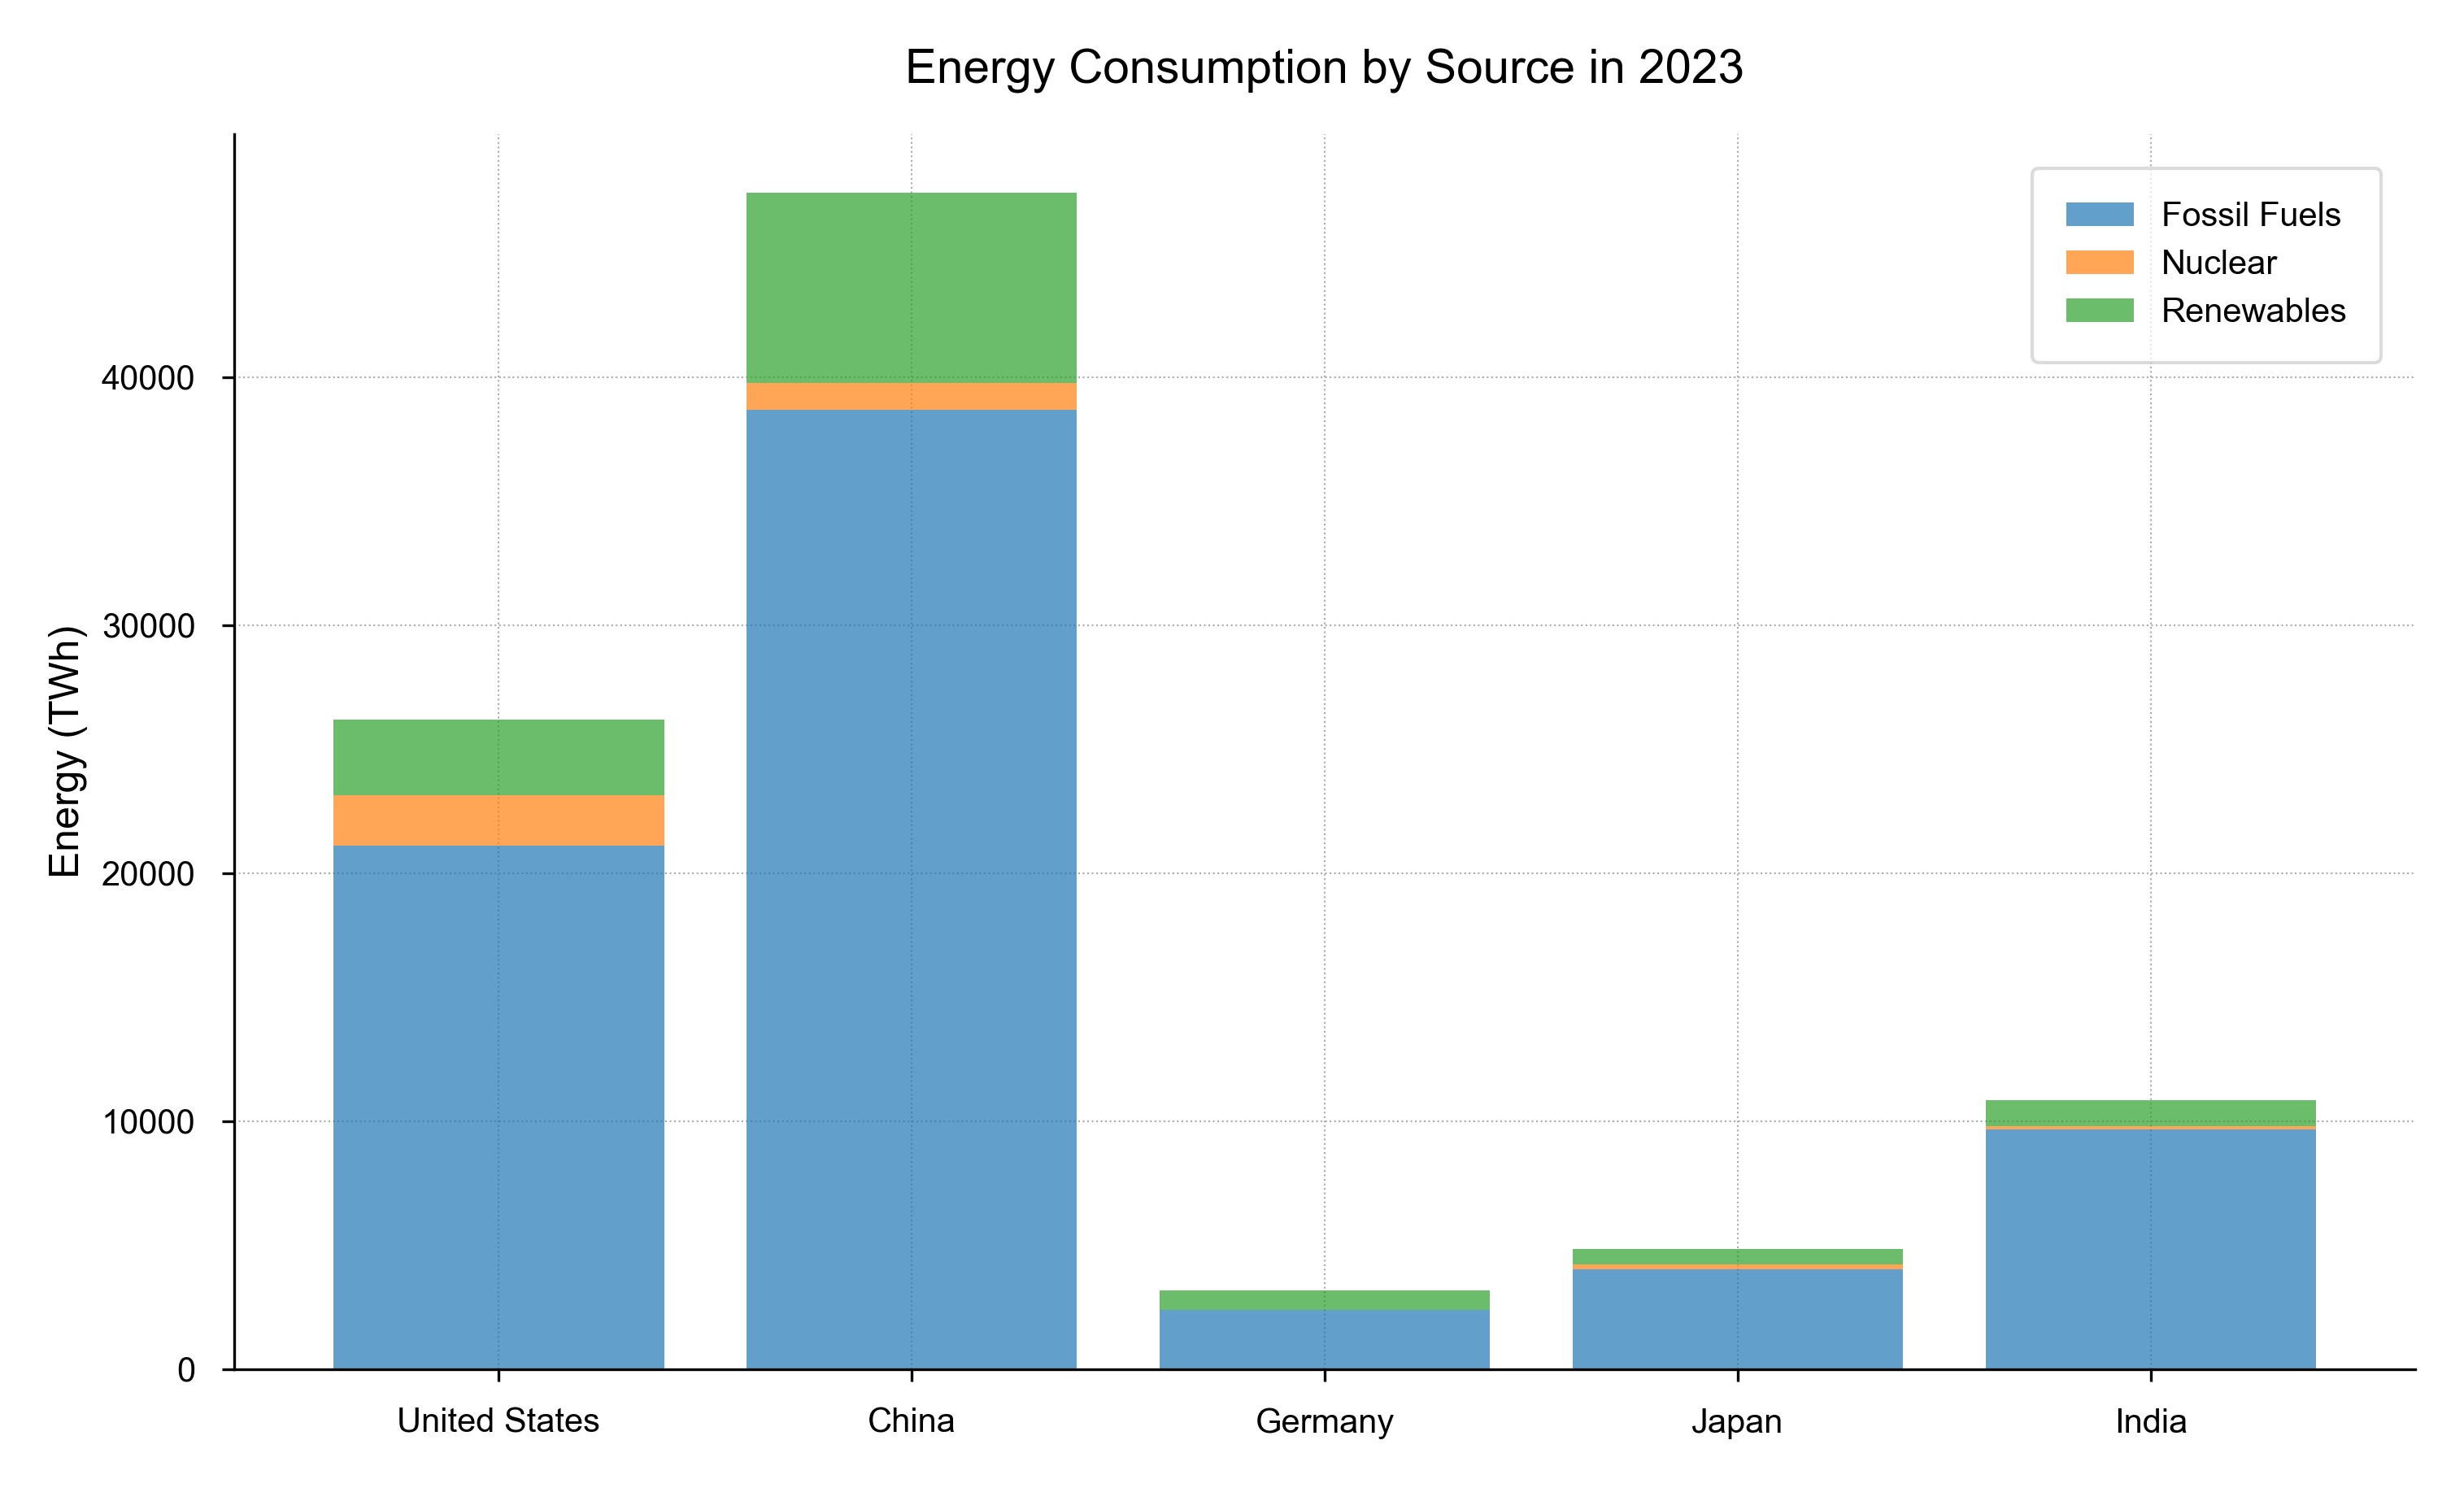

In [ ]:
# plt.figure(figsize=(10, 6))

df_2023 = df[df["year"] == 2023]
countries = ["United States", "China", "Germany", "Japan", "India"]
fields = ["fossil_fuel_consumption", "nuclear_consumption", "renewables_consumption"]
field_labels = ["Fossil Fuels", "Nuclear", "Renewables"]

formatted_data = []
for field in fields:
    country_data = []
    for country in countries:
        country_data.append(df_2023[df_2023["country"] == country][field].values[0])
    formatted_data.append(country_data)

# print(formatted_data)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_axisbelow(True)

bottom = np.zeros(len(countries))
for i, subcategory_data in enumerate(formatted_data):
    ax.bar(countries, subcategory_data, bottom=bottom, label=field_labels[i], alpha=0.7)
    bottom += subcategory_data

ax.set_title("Energy Use by Source in 2023")
ax.set_ylabel("Energy (TWh)")
# ax.set_xlabel("Country")
# ax.legend(loc="upper right")
ax.legend(
    loc="upper right",
    frameon=True,
    # fancybox=True,
    # shadow=True,
    framealpha=0.7,
    borderpad=1,
)

# plt.savefig("sine_wave.png")
plt.show()

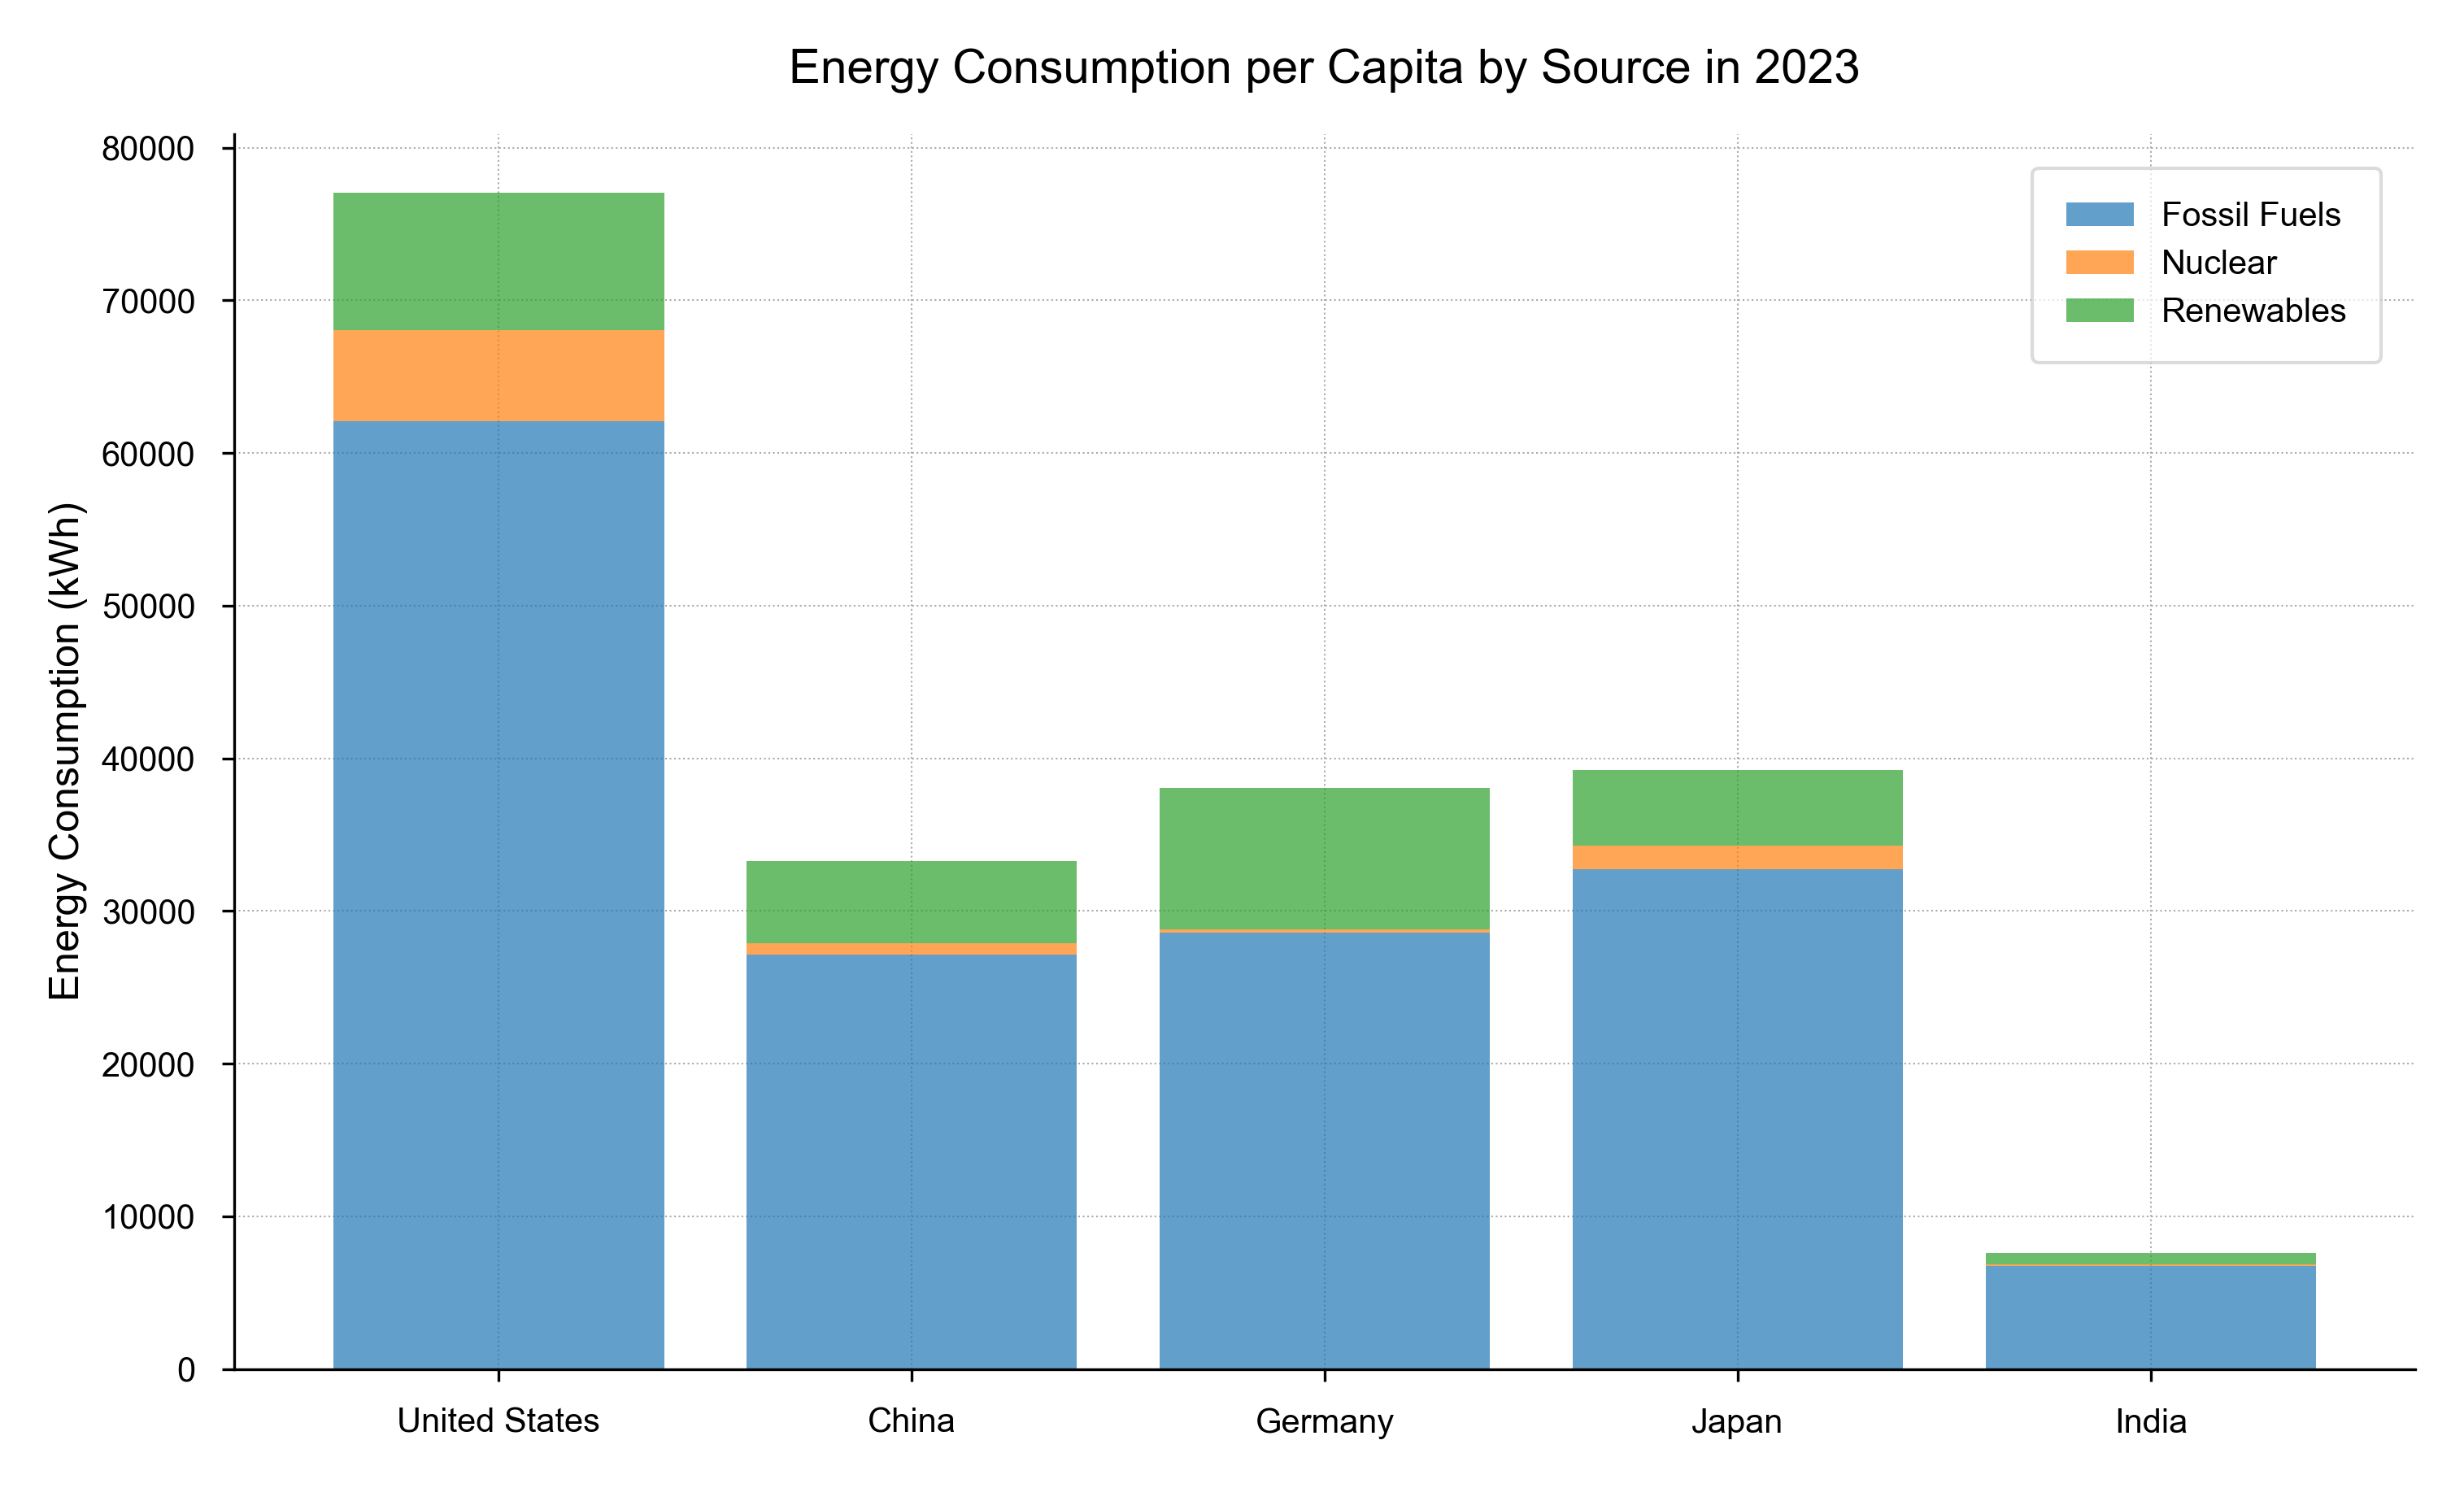

In [ ]:
# plt.figure(figsize=(10, 6))

df_2023 = df[df["year"] == 2023]
countries = ["United States", "China", "Germany", "Japan", "India"]
fields = ["fossil_energy_per_capita", "nuclear_energy_per_capita", "renewables_energy_per_capita"]
field_labels = ["Fossil Fuels", "Nuclear", "Renewables"]

formatted_data = []
for field in fields:
    country_data = []
    for country in countries:
        country_data.append(df_2023[df_2023["country"] == country][field].values[0])
    formatted_data.append(country_data)

# print(formatted_data)

fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(left=0.8, right=0.95, top=0.9, bottom=0.15)
ax.set_axisbelow(True)

bottom = np.zeros(len(countries))
for i, subcategory_data in enumerate(formatted_data):
    ax.bar(countries, subcategory_data, bottom=bottom, label=field_labels[i], alpha=0.7)
    bottom += subcategory_data

ax.set_title("Energy Use per Capita by Source in 2023")
ax.set_ylabel("Energy (kWh)")
ax.legend(
    loc="upper right",
    frameon=True,
    # fancybox=True,
    # shadow=True,
    framealpha=0.7,
    borderpad=1,
)

plt.show()